In [0]:
from google.colab import files
uploaded = files.upload()

Saving auction.csv to auction.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import re
import io
import time
from mpl_toolkits.mplot3d import Axes3D

\begin{gathered}
\text{Cost function}\newline
\rule{20cm}{0.4pt}\newline
J(\theta) = \frac{1}{2m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})\newline\newline
\text{Vectorized form:}\newline
J(\theta)=\frac{1}{2m}(X\theta-\vec{y})^T(X\theta-\vec{y})
\end{gathered}


In [0]:
df = pd.read_csv(io.StringIO(uploaded['auction.csv'].decode('utf-8')))
X = df.drop(['Price'],axis=1)
X.reset_index(drop=True,inplace=True)
m = len(X)
f = len(X.columns)
X = np.hstack((np.ones(shape=(m,1)),X))
T = np.zeros(f + 1)
Y = df.Price

In [0]:
def calculateCost(T):
    global m,X
    hypot = (X.dot(T) - Y).transpose().dot(X.dot(T) - Y)
    return hypot / (2 * m)
calculateCost(T)

955534.265625

\begin{gathered}
\text{Gradient descent}\\
\rule{20cm}{0.4pt}\\
\text{For multivariate linear regression with }n\text{ features, repeat until convergence: \{}\\
\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}-y^{(i)}))\cdot x_0^{(i)}\\
\vdots\\
\theta_n := \theta_n - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}-y^{(i)}))\cdot x_n^{(i)}\\
\\\}\\\\
\text{Vectorized form}\\
\rule{20cm}{0.4pt}\\
\theta:=\theta - \alpha\nabla J(\theta)\\\\
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m x^{(i)}_j \cdot(h_\theta(x^{(i)}-y^{(i)})\\
=\frac{1}{m}X^T(X\theta - \vec{y})\\\\
\nabla J(\theta) = 
\begin{bmatrix}
    \frac{\partial J(\theta)}{\partial \theta_0}\\
    \frac{\partial J(\theta)}{\partial \theta_1}\\
    \vdots\\
    \frac{\partial J(\theta)}{\partial \theta_n}
\end{bmatrix}
\end{gathered}

In [0]:
def gradDescent(threshold,iter = 10000,alpha = 3e-8):
    global T,X,Y,m
    i = 0
    cost = calculateCost(T)
    cost_hist = [cost]
    T_hist = []
    while i < iter:
        curr_cost = calculateCost(T)
        T_hist = T - (alpha / m) * X.transpose().dot(X.dot(T) - Y)

        if curr_cost > cost:
            print(f"LEARNING RATE TOO LARGE ({curr_cost} > {cost})")
            break
        else:
            cost = curr_cost
            T = T_hist
            cost_hist.append(cost)

        i += 1
        if cost <= threshold:
            return cost_hist
    plt.plot(cost_hist)

In [0]:
cost_hist = gradDescent(8041,10**7,0.00009)

Cost: 8040.999956750676


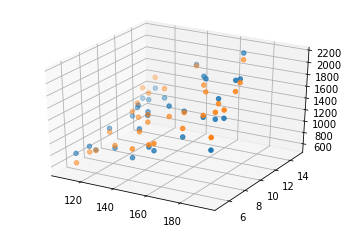

In [0]:
y_hat = T[0] + df.Age * T[1] + df.Bidders * T[2]
print(f"Cost: {calculateCost(T)}")
ax = plt.axes(projection='3d')
ax.scatter(df.Age,df.Bidders,df.Price)  # Actual value
ax.scatter(df.Age,df.Bidders,y_hat)     # Predicted value